In [ ]:
##FMCG SALES ANALYSIS REPORT

In [ ]:
ASK

The Goal of this project is to 
1. Analyse the sales of the brands i.e.Yearly , Quarterly, Monthly 
2. Finding Sales of each Brand yearly,quartely,monthly.
3. Finding Sales by Retail buyer
4. Analysis of sales subcategory wise
5. Finding the Top 10 highest selling products Amount and Quantity wise
6. Finding the Sales of each brand
7. Analysis of Total Units sold v/s Dead Stock

In [1]:
##Importing Libraries and reading the FMCG csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.image as image
import datetime
from sklearn.preprocessing import StandardScaler
!pip install nbconvert
!pip install pyppeteer
!jupyter nbconvert --to webpdf --allow-chromium-download untitled.ipynb
df = pd.read_csv(r'/Users/attrizgautam/Downloads/Project_file - Sheet1-2.csv')
df

[NbConvertApp] Converting notebook untitled.ipynb to webpdf
[NbConvertApp] Building PDF
[INFO] Starting Chromium download.
100%|██████████████████████████████████████| 86.8M/86.8M [00:48<00:00, 1.79Mb/s]
[INFO] Beginning extraction
[INFO] Chromium extracted to: /Users/attrizgautam/Library/Application Support/pyppeteer/local-chromium/588429
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 71364 bytes to untitled.pdf


,Brand Name,Invoice Date,Invoice Month,Quarter,Product Name,Category,Subcategory,Weight in Grams,Pieces Per Box,Price per Box,Box Ordered,Total Units,Value,BUYER,Dead Stock in piece
0,Nivea,25/01/2022,January,Q1,Nivea Aloe Hydration Body Lotion for Normal Skin,Cosmetic,Body Lotion,400,20,5500,10,200,55000,VMART Retail,2
1,Nivea,05/01/2022,January,Q1,Nivea Aloe Hydration Skin Cream,Cosmetic,Cream,50,40,6500,22,880,143000,DMART,3
2,Nivea,05/01/2022,January,Q1,Nivea Aloe Hydration Skin Cream,Cosmetic,Cream,50,20,6500,18,360,117000,Vishal Mega Mart,3
3,Nivea,25/01/2022,January,Q1,Nivea Aloe Protection Body Lotion SPF 15,Cosmetic,Body Lotion,400,25,7000,15,375,105000,Reliance Retail,2
4,Nivea,15/01/2022,January,Q1,Nivea Aloe Protection Body Lotion SPF 15,Cosmetic,Body Lotion,400,50,6500,24,1200,156000,Reliance Retail,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,Capital Foods,20/12/2022,December,Q4,CHINGS INS TOMATO SOUP,Food & Beverages,Soup,150,10,800,12,120,9600,Reliance Retail,1
9524,Capital Foods,01/12/2022,December,Q4,CHINGS MANCHOW SOUP,Food & Beverages,Soup,60,40,1500,13,520,19500,Reliance Retail,2
9525,Capital Foods,13/12/2022,December,Q4,CHINGS JUST SOAK WH.WHEAT HAKKA,Food & Beverages,Noodles,60,40,1800,12,480,21600,Vishal Mega Mart,2
9526,Capital Foods,01/12/2022,December,Q4,CHINGS LEMON CORIANDER SOUP,Food & Beverages,Soup,60,40,800,15,600,12000,VMART Retail,2


In [2]:
#Checking for null value
df.isnull().sum()

Brand Name             0
Invoice Date           0
Invoice Month          0
Quarter                0
Product Name           0
Category               0
Subcategory            0
Weight in Grams        0
Pieces Per Box         0
Price per Box          0
Box Ordered            0
Total Units            0
Value                  0
BUYER                  0
Dead Stock in piece    0
dtype: int64

In [3]:
# Calculating the Total amount of the Sales for the year 2022
Total_sales = df['Value'].sum()
Total_sales

388517470

In [ ]:
Here we can see the total sales for the yea 2022 is Rs.388517470

In [4]:
#Calculating the Quartely Sales
Quartely_sales = df.groupby(['Quarter'])['Total Units'].sum()
Quartely_sales

Quarter
Q1    1012540
Q2    1023110
Q3     888060
Q4     946330
Name: Total Units, dtype: int64

<AxesSubplot:xlabel='Quarter'>

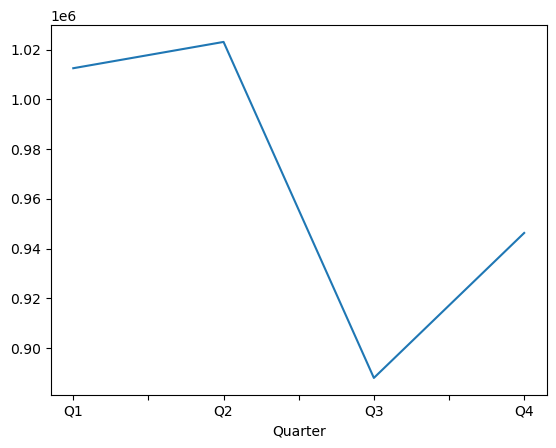

In [5]:
#Plotting Quartely Sales Graph 
Quartely_sales.plot(kind='line')

In [6]:
#Calculating Monthly Sales
cats = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['Invoice Month'] = pd.Categorical(df['Invoice Month'], categories=cats, ordered=True)
df1 = df.sort_values([ "Invoice Month"])
#print (df1)
dfm = df1.groupby(['Invoice Month'])['Value'].sum()
dfm

Invoice Month
January      41931840
February     28539280
March        32668320
April        36968000
May          37538610
June         27536380
July         26556650
August       30922440
September    29614350
October      30296580
November     32661350
December     33283670
Name: Value, dtype: int64

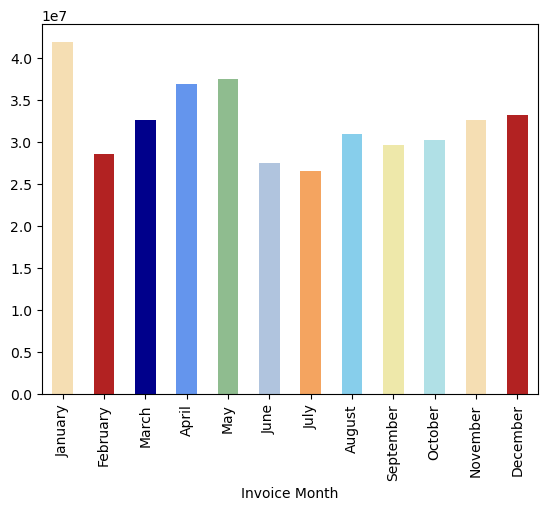

In [7]:
#Plotting Monthly Sales Graph
dfm.plot(x="Invoice Month", y="Value", kind="bar",stacked=True, color=['wheat','firebrick','darkblue','cornflowerblue','darkseagreen','lightsteelblue','sandybrown','skyblue','palegoldenrod','powderblue'])
plt.show()

In [8]:
#Calculating  Yearly Brand sale
Yearly_sales_brand = df.groupby(['Brand Name'])['Value'].sum()
Yearly_sales_brand

Brand Name
Capital Foods      79428150
ITC               101028200
McVitie's           2884250
Nestle India       54800550
Nivea             136243000
Vini Cosmetics     14133320
Name: Value, dtype: int64

<AxesSubplot:xlabel='Brand Name'>

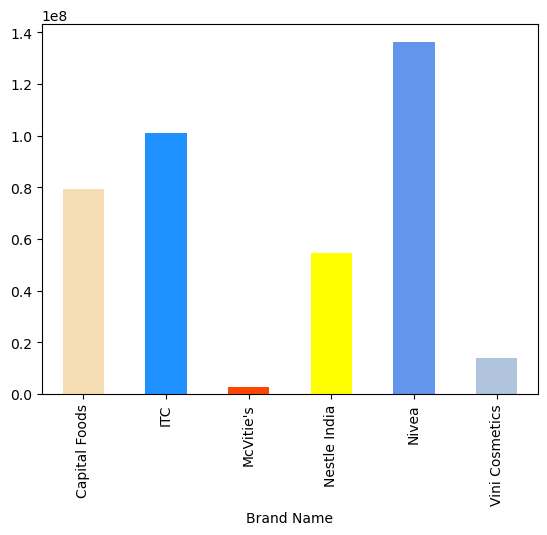

In [9]:
#Plotting Graph for Yearly Brand Sale
Yearly_sales_brand.plot(kind='bar', stacked=True, color=['wheat','dodgerblue','orangered','yellow','cornflowerblue','lightsteelblue'])

In [10]:
#Calculating sales by Brand Name Quarter wise
quarterly_sales_brand = df.groupby(['Brand Name','Quarter'],as_index=False)['Value'].sum()
quarterly_sales_brand

,Brand Name,Quarter,Value
0,Capital Foods,Q1,20315850
1,Capital Foods,Q2,21278700
2,Capital Foods,Q3,18964200
3,Capital Foods,Q4,18869400
4,ITC,Q1,27256450
5,ITC,Q2,26221050
6,ITC,Q3,22180500
7,ITC,Q4,25370200
8,McVitie's,Q1,827300
9,McVitie's,Q2,705150


<AxesSubplot:xlabel='Brand Name', ylabel='Value'>

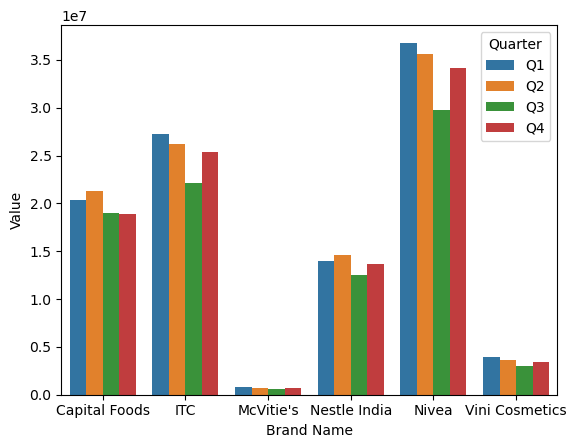

In [11]:
#Plotting graph for sales by Brand Name Quarter wise
sb.barplot(x ='Brand Name',y = 'Value', hue = "Quarter", data = quarterly_sales_brand) 

In [12]:
#Calculation of goods purchase by retail Buyers
buyer_wise = df.groupby(['BUYER'])['Value'].sum()
buyer_wise

BUYER
DMART               111411320
Reliance Retail     108799850
VMART Retail         81782100
Vishal Mega Mart     86524200
Name: Value, dtype: int64

<AxesSubplot:ylabel='Value'>

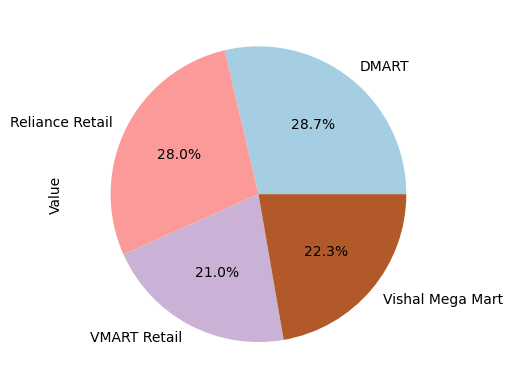

In [13]:
#Plotting Pie Chart 
buyer_wise.plot(kind='pie', stacked=True, colormap='Paired',autopct='%1.1f%%')

In [14]:
#Grouping Product By Category And Subcategory for Analysis
sub_cate = df.groupby(['Category','Subcategory'],sort = True)['Value'].agg('count')
sub_cate

Category          Subcategory         
Cosmetic          After Shaving Lotion      24
                  Body Lotion              528
                  Body Serum                24
                  Body Wash                204
                  Candy                     24
                  Cleansing Milk            24
                  Cream                    288
                  Deodorant                300
                  Disinfectant Liquid       48
                  Disinfectant Spray        72
                  Disinfectant liquid       24
                  Face Wash                396
                  Handwash                 420
                  Lip Balm                  12
                  Nourish Oil               48
                  Sanitizer                144
                  Scrub                     12
                  Serum                     12
                  Shaving Cream             48
                  Shower Gel               360
                  Soa

<AxesSubplot:xlabel='Category,Subcategory'>

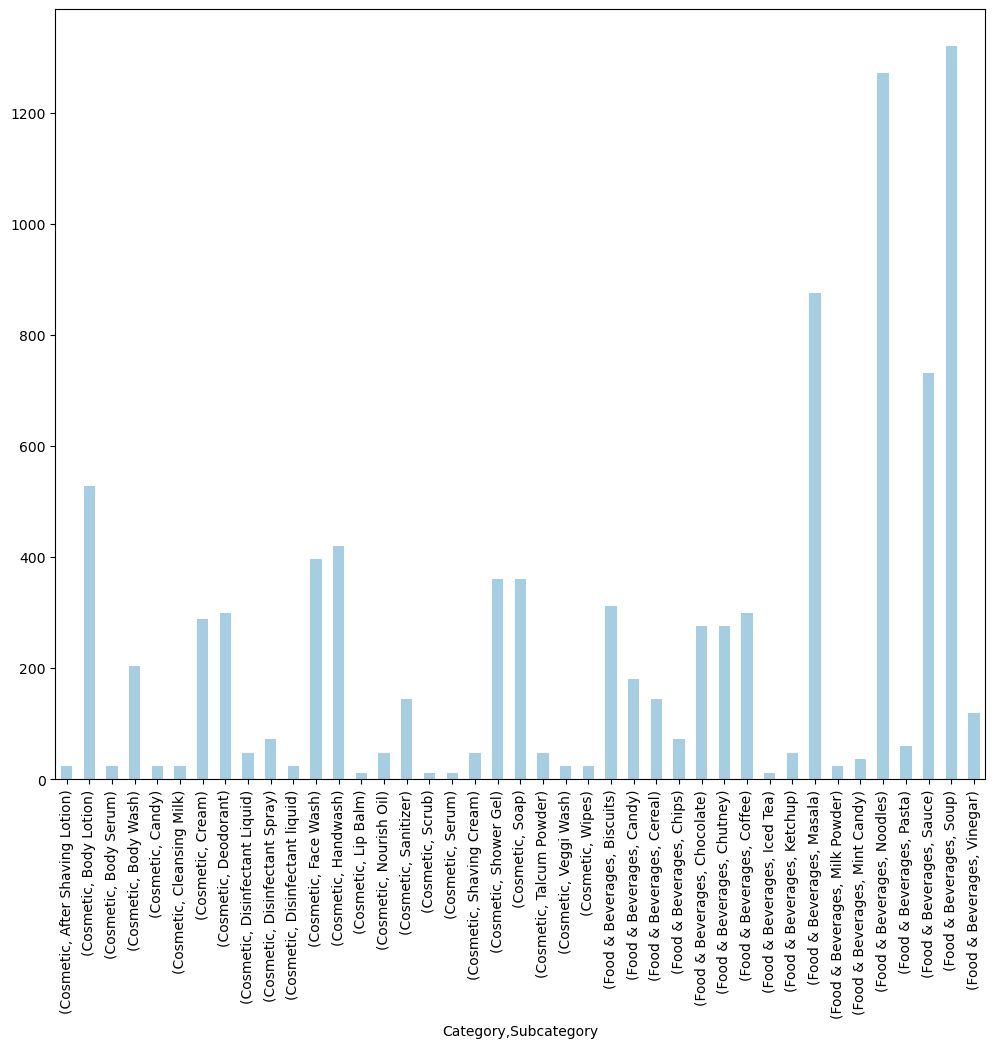

In [15]:
#Plotting a Subcategory Graph
plt.figure(figsize=(12,10))
sub_cate.plot(kind='bar',stacked=True,colormap='Paired')

In [16]:
#Grouping by Product Name and Finding the top 10 selling products by Value
Top_wise = df.groupby(['Product Name'])['Value'].sum()
top =Top_wise.nlargest(10)
top

Product Name
CHINGS JUST SOAK V.HAKKA NOODLES                                                   5909200
CHINGS SCHEZWAN CHUTNEY                                                            5856650
Nivea Men Dark Spot Reduction Face Wash                                            5606000
Nivea Cocoa Nourish Oil in Lotion 5 in 1 Complete Care for Very Dry Skin           4836000
Nivea Aloe Protection Body Lotion SPF 15                                           4518500
Nivea Multi-Purpose Creme                                                          4269500
CHINGS MANCHOW SOUP                                                                4188150
Nivea Nourishing Lotion Body Milk 5 in 1 Complete Care for Dry to Very Dry Skin    4167000
CHINGS SWEET CORN SOUP                                                             3988200
Nivea Soft Light Moisturiser                                                       3793000
Name: Value, dtype: int64

<AxesSubplot:xlabel='Product Name'>

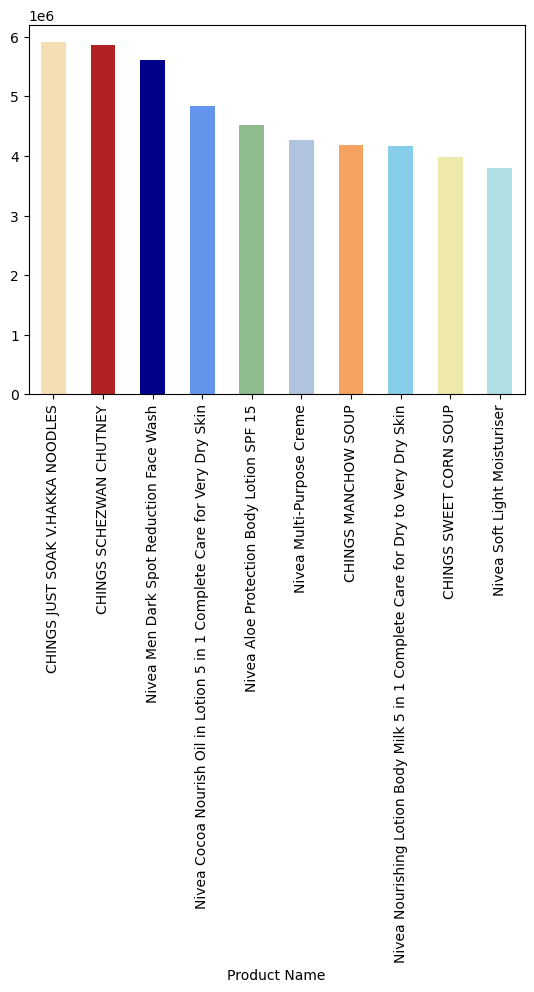

In [17]:
#Plotting a Graph for the top 10 selling products
top.plot(kind='bar', stacked=True, color=['wheat','firebrick','darkblue','cornflowerblue','darkseagreen','lightsteelblue','sandybrown','skyblue','palegoldenrod','powderblue'])

In [18]:
#Grouping by Product Name and Finding the top 10 selling products by Units sold
Top_unit = df.groupby(['Product Name'])['Total Units'].sum()
top1 =Top_unit.nlargest(10)
top1

Product Name
CHINGS JUST SOAK V.HAKKA NOODLES    129325
CHINGS MANCHOW SOUP                  86355
CHINGS SCHEZWAN CHUTNEY              84920
CHINGS RED CHILLI SAUCE              79375
CHINGS SWEET CORN SOUP               77615
CHINGS HOT GARLIC NOODLES            72510
CHINGS DARK SOY SAUCE                68470
S&J PASTA MASALA                     65585
CHINGS CHILLI VINEGAR                64975
CHINGS HOT&SOUR SOUP                 60570
Name: Total Units, dtype: int64

<AxesSubplot:xlabel='Product Name'>

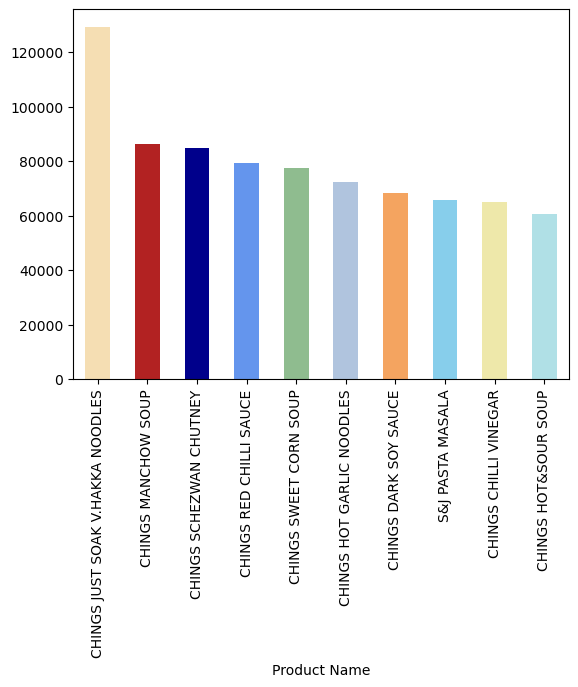

In [19]:
#Plotting Graph 
top1.plot(kind='bar', stacked=True, color=['wheat','firebrick','darkblue','cornflowerblue','darkseagreen','lightsteelblue','sandybrown','skyblue','palegoldenrod','powderblue'])

In [20]:
#Grouping by Product Name and Finding the lowest 10 selling products by Value
lowest_wise = df.groupby(['Product Name'])['Value'].sum()
low = lowest_wise.nsmallest(10)
low

Product Name
Mcvitie's Wholewheat Marie Biscuit             15900
MAGGI Nutri-licious OatsNoodles Masala 4pcs    36300
MAGGI Masala Cuppa                             46500
MAGGI 2 minutes noodles 12pcs                  47700
Maggi Fusian Bangkok Sweet Chili               51600
Bingo! Starters                                60500
Sunfeast Farmlite                              62000
Mcvitie's Oat Cookie                           66550
Bingo! Potato Chips                            68800
Sunfeast YiPPee Noodles                        68800
Name: Value, dtype: int64

<AxesSubplot:xlabel='Product Name'>

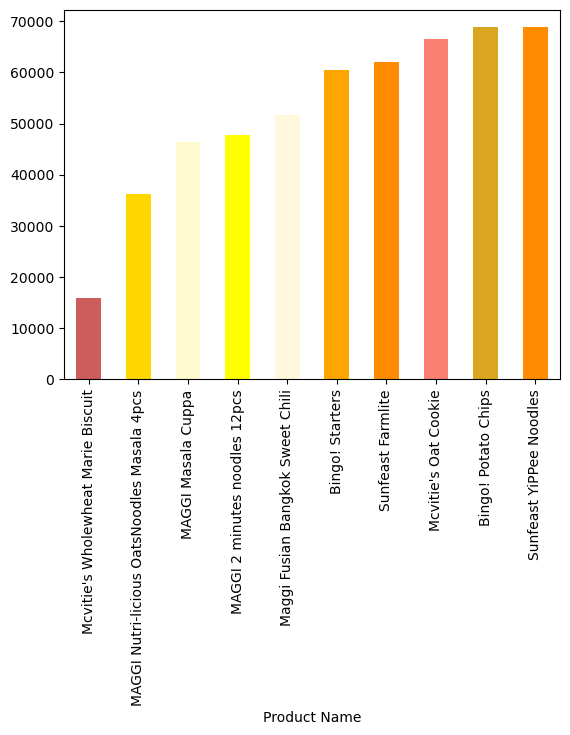

In [21]:
#Plotting Graph for lowest 10 selling products by Value
low.plot(kind='bar', stacked=True, color=['indianred','gold','lemonchiffon','yellow','cornsilk','orange','darkorange','salmon','goldenrod','darkorange'])

In [22]:
#Calculating Total Units Solds in year 2022
total = df['Total Units'].sum()
print("Total units sold is", total)

Total units sold is 3870040


In [23]:
#Calculating Total Dead Stock in year 2022
total_dead = df['Dead Stock in piece'].sum()
print("Total units of Dead Stock is",total_dead)

Total units of Dead Stock is 18990


In [24]:
#Calculating Total stock And Dead Stock Quarterly
units_quarterly = df.groupby(['Quarter'])['Total Units'].agg(sum)
print("Total units sold quarterly is",units_quarterly)
deadstock_quarterly = df.groupby(['Quarter'])['Dead Stock in piece'].agg(sum)
print("total Dead stock quarterly is",deadstock_quarterly)

Total units sold quarterly is Quarter
Q1    1012540
Q2    1023110
Q3     888060
Q4     946330
Name: Total Units, dtype: int64
total Dead stock quarterly is Quarter
Q1    4705
Q2    4780
Q3    4730
Q4    4775
Name: Dead Stock in piece, dtype: int64


In [25]:
#Concatinating Total stock And Dead Stock Quarterly
total_units_deadstock = pd.concat([units_quarterly,deadstock_quarterly],axis=1)
total_units_deadstock

,Total Units,Dead Stock in piece
Quarter,,
Q1,1012540,4705
Q2,1023110,4780
Q3,888060,4730
Q4,946330,4775


<AxesSubplot:xlabel='Quarter'>

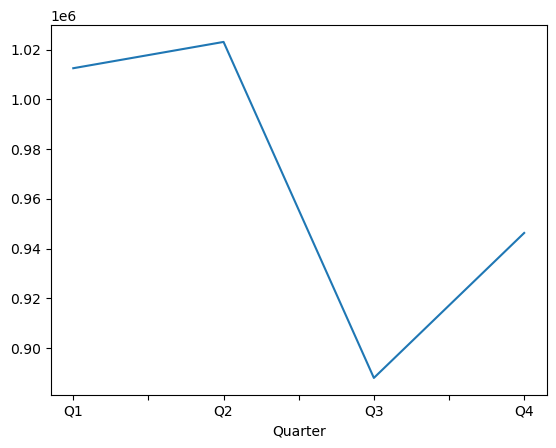

In [26]:
#Plotting Total Units sold Quarterly 
units_quarterly.plot(kind='line')

<AxesSubplot:xlabel='Quarter'>

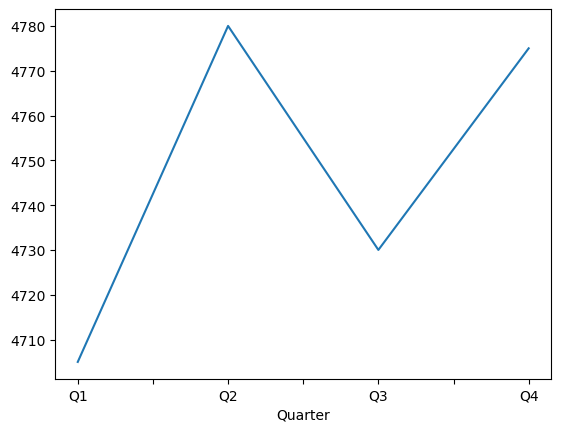

In [27]:
#Plotting Dead Stock Quarterly
deadstock_quarterly.plot(kind='line')

In [ ]:
##CONCLUSION:
1. There is a decrease in quarterly sales in Q3'FY 22 by '-13.19%' w.r.t sales in Q2'FY 22
2. June and July are the months with the lowest sales figures i.e. June: 27536380, July:26556650 
3. In Food and Bevearages category, Mcvitie's Brand has the lowest sale percentage i.e.'0.75%' of Total Sales
4. Need to Increase the sales of Brands  Vini Cosmetics, Nestle and McVitie's
5. Dmart and reliance retails are the biggest buyers contributing '56.7%' of Total Sales
6. Need to focus on Subcategories with the yearly sales count of less then 60 units of boxes
7. Q2 and Q4 shows the higest amount of Dead Stock Inventory with Q2:4780, Q4:4775.
